<a href="https://colab.research.google.com/github/Welberth77/Projeto-IA/blob/main/student-performance-repo/notebooks/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# 1. Instalar dependências

!pip install pandas numpy scikit-learn matplotlib joblib

# 2. Imports principais

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import joblib
import requests, zipfile, io

# 3. Download automático do dataset

print("Baixando dataset do UCI...")
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip'
r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
df = pd.read_csv(z.open('student-mat.csv'), sep=';')

print("\nDataset carregado com sucesso!")
df.head()


Baixando dataset do UCI...

Dataset carregado com sucesso!


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
# 4. Preparação dos dados

df['pass'] = (df['G3'] >= 10).astype(int)

numeric_features = ['age', 'absences', 'G1', 'G2']
categorical_features = ['sex', 'school', 'address', 'famsize', 'Pstatus']

X = pd.get_dummies(df[numeric_features + categorical_features], drop_first=True)

y_reg = df['G3']
y_clf = df['pass']

X_train, X_test, yreg_train, yreg_test, yclf_train, yclf_test = train_test_split(
    X, y_reg, y_clf, test_size=0.2, random_state=42, stratify=y_clf
)


In [6]:
# 5. Regressão Linear

lr = LinearRegression()
lr.fit(X_train, yreg_train)
pred_reg = lr.predict(X_test)

r2 = r2_score(yreg_test, pred_reg)
rmse = np.sqrt(mean_squared_error(yreg_test, pred_reg))

print("\nRegressão Linear")
print("R²:", r2)
print("RMSE:", rmse)



Regressão Linear
R²: 0.8007899759571703
RMSE: 2.000215612219229


In [7]:
# 6. Regressão Logística

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, yclf_train)

pred_clf = clf.predict(X_test)
probs = clf.predict_proba(X_test)[:,1]

acc = accuracy_score(yclf_test, pred_clf)
auc = roc_auc_score(yclf_test, probs)

print("\nRegressão Logística")
print("Accuracy:", acc)
print("AUC:", auc)
print("Confusion Matrix:\n", confusion_matrix(yclf_test, pred_clf))
print("\nClassification Report:\n", classification_report(yclf_test, pred_clf))



Regressão Logística
Accuracy: 0.8481012658227848
AUC: 0.9615384615384617
Confusion Matrix:
 [[23  3]
 [ 9 44]]

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.88      0.79        26
           1       0.94      0.83      0.88        53

    accuracy                           0.85        79
   macro avg       0.83      0.86      0.84        79
weighted avg       0.86      0.85      0.85        79



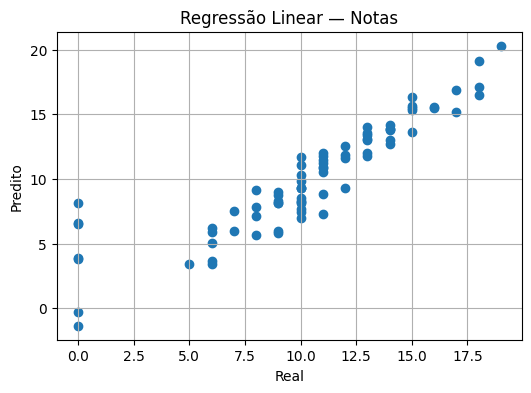

In [8]:
# 7. Visualização simples

plt.figure(figsize=(6,4))
plt.scatter(yreg_test, pred_reg)
plt.xlabel("Real")
plt.ylabel("Predito")
plt.title("Regressão Linear — Notas")
plt.grid(True)
plt.show()


In [9]:
# 8. Salvar modelos (opcional)

joblib.dump(lr, "linear_regression.joblib")
joblib.dump(clf, "logistic_regression.joblib")

print("\nModelos salvos!")



Modelos salvos!
